MOVIE DATA ANALYSIS   
Read project overview to understand procedure

                  FETCH DATA USING API

In [ ]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path


import os
from dotenv import load_dotenv

load_dotenv()
env_path = Path(__file__).resolve().parent.parent / ".env"
load_dotenv(dotenv_path=env_path)
api_key = os.getenv("API_KEY")


url = "https://api.themoviedb.org/3/movie/{}?api_key={}&append_to_response=credits" 

movie_ids = [0, 299534, 19995, 140607, 299536, 597, 135397,
 420818, 24428, 168259, 99861, 284054, 12445,
 181808, 330457, 351286, 109445, 321612, 260513]  

data = []

for movie_id in movie_ids:
    response = requests.get(url.format(movie_id, API_KEY))
    if response.status_code == 200:
        data.append(response.json())

df = pd.DataFrame(data)
print(df.head())

In [ ]:

path = r"C:\Users\USER\Desktop\Amasah\Amalitech\Movie_Data_Analysis\mdata.csv"

data = pd.read_csv(path)
data.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",356000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799439100,181,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26209,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,...,2923706026,162,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Enter the world of Pandora.,Avatar,False,7.588,32117,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,...,2068223624,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19666,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,...,2052415039,149,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30387,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,...,2264162353,194,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Nothing on Earth could come between them.,Titanic,False,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [2]:
data.columns

Index(['adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres',
       'homepage', 'id', 'imdb_id', 'origin_country', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

Data Cleaning and Preprocessing


In [20]:
def drop_columns(df, columns):
    """
    Drops specified columns from the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    columns (list): List of column names to drop.

    Returns:
    pd.DataFrame: The modified DataFrame.
    """
    df.drop(columns=columns, inplace=True)
    return df

columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
df = drop_columns(df, columns_to_drop)


In [ ]:
# def drop_columns(df, columns_to_drop):
#     df.drop(columns=columns_to_drop, inplace=True)
#     return df

# columns_to_drop = ['adult', 'imdb_id', 'original_title', 'video', 'homepage']
# drop_columns(df, columns_to_drop)

Evaluate json like columns.
run function to extract text from json columns 

In [6]:
import ast


def clean_dict_columns(df):
    """
    Cleans specified dictionary/list columns in the DataFrame by extracting the 'name' key
    and replaces original columns with cleaned string values.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame to process.
    
    Returns:
    pd.DataFrame: The DataFrame with cleaned columns.
    """

    def extract_name_from_dict(obj, key='name'):
        try:
            obj = ast.literal_eval(obj) if isinstance(obj, str) else obj
            if isinstance(obj, dict):
                return obj.get(key)
            elif isinstance(obj, list):
                return '|'.join(item.get(key, '') for item in obj if isinstance(item, dict))
        except:
            return None

    columns_to_clean = [
        'belongs_to_collection',
        'genres',
        'spoken_languages',
        'production_countries',
        'production_companies'
    ]

    for col in columns_to_clean:
        df[col] = df[col].apply(lambda x: extract_name_from_dict(x))

    return df


In [7]:
df = clean_dict_columns(df)
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26209,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,...,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,False,7.588,32117,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,...,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19666,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,...,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30387,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,Drama|Romance,https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,...,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on Earth could come between them.,Titanic,False,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


ANOMALIES DETECTED

During data inspection, the genres column was found to contain multiple genres combined with a pipe (|) separator.

 Many unique combinations exist that differ only in order, such as Action|Adventure|Science Fiction vs. Adventure|Science Fiction|Action. These represent the same genres but are treated as separate values, which can lead to inconsistency in analysis and visualization.
 Similarly, the production_countries column shows combinations like United States of America|United Kingdom and its reversed version

Handling Missing & Incorrect Data


convert column to appropriate data types

In [ ]:

def convert_columns(df, numeric_cols=None, datetime_col=None):
    """
    Converts specified columns in the DataFrame to appropriate data types.

    Parameters:
    df (pd.DataFrame): The input DataFrame to modify.
    numeric_cols (list, optional): List of column names to convert to numeric.
    datetime_col (str, optional): Name of the column to convert to datetime.

    Returns:
    pd.DataFrame: The DataFrame with converted columns.
    """
    if numeric_cols:
        for col in numeric_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    if datetime_col:
        df[datetime_col] = pd.to_datetime(df[datetime_col], errors='coerce')
    
    return df

numeric_columns = ['budget', 'id', 'popularity']
datetime_column = 'release_date'

df = convert_columns(df, numeric_cols=numeric_columns, datetime_col=datetime_column)




In [10]:
df.dtypes

adult                              bool
backdrop_path                    object
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
origin_country                   object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                           int64
runtime                           int64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64


In [11]:
df.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356000000,Adventure|Science Fiction|Action,https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26209,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237000000,Action|Adventure|Fantasy|Science Fiction,https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,...,2923706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,False,7.588,32117,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,Star Wars Collection,245000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,...,2068223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19666,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300000000,Adventure|Action|Science Fiction,https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,...,2052415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30387,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200000000,Drama|Romance,https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,...,2264162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on Earth could come between them.,Titanic,False,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


convert columns to Million usd and edit column values

In [12]:
def convert_to_millions(df, cols):
    """
    Converts specified columns to millions by dividing by 1,000,000.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to modify.
    cols (list): List of column names to convert.
    
    Returns:
    pd.DataFrame: The DataFrame with updated columns.
    """
    for col in cols:
        df[col] = df[col] / 1_000_000
    return df

df = convert_to_millions(df, ['budget', 'revenue'])


In [13]:
#rename columns
df.rename(columns={'budget': 'budget_musd', 'revenue': 'revenue_musd'}, inplace=True)
df.head()

,adult,backdrop_path,belongs_to_collection,budget_musd,genres,homepage,id,imdb_id,origin_country,original_language,...,revenue_musd,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits
0,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,The Avengers Collection,356.0,Adventure|Science Fiction|Action,https://www.marvel.com/movies/avengers-endgame,299534,tt4154796,['US'],en,...,2799.439100,181,English|日本語|,Released,Avenge the fallen.,Avengers: Endgame,False,8.238,26209,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
1,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,Avatar Collection,237.0,Action|Adventure|Fantasy|Science Fiction,https://www.avatar.com/movies/avatar,19995,tt0499549,['US'],en,...,2923.706026,162,English|Español,Released,Enter the world of Pandora.,Avatar,False,7.588,32117,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
2,False,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,Star Wars Collection,245.0,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,['US'],en,...,2068.223624,136,English,Released,Every generation has a story.,Star Wars: The Force Awakens,False,7.262,19666,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
3,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,The Avengers Collection,300.0,Adventure|Action|Science Fiction,https://www.marvel.com/movies/avengers-infinit...,299536,tt4154756,['US'],en,...,2052.415039,149,English|,Released,Destiny arrives all the same.,Avengers: Infinity War,False,8.236,30387,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."
4,False,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,None,200.0,Drama|Romance,https://www.paramountmovies.com/movies/titanic,597,tt0120338,['US'],en,...,2264.162353,194,English|Français|Deutsch|svenska|Italiano|Pусский,Released,Nothing on Earth could come between them.,Titanic,False,7.900,25867,"{'cast': [{'adult': False, 'gender': 2, 'id': ..."


In [15]:
df["vote_average"]

0     8.238
1     7.588
2     7.262
3     8.236
4     7.900
5     6.692
6     7.109
7     7.734
8     7.225
9     7.271
10    7.373
11    8.087
12    6.780
13    7.250
14    6.538
15    7.246
16    6.971
17    7.454
Name: vote_average, dtype: float64

In [21]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget_musd', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue_musd', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

In [17]:
df[['revenue_musd', 'runtime','runtime']]

,revenue_musd,runtime,runtime
0,2799.439100,181,181
1,2923.706026,162,162
2,2068.223624,136,136
3,2052.415039,149,149
4,2264.162353,194,194
5,1671.537444,124,124
6,1662.020819,118,118
7,1518.815515,143,143
8,1515.400000,137,137
9,1405.403694,141,141


REMOVE DUPLICATES AND DROP NAN COLUMNS

In [22]:
#. remove dublicates and drop drop rows with unkown id
def clean_duplicates_and_missing(df, subset_cols=['id', 'title']):
    """
    Removes duplicate rows based on given columns and drops rows with missing values in those columns.

    Parameters:
    df (pd.DataFrame): The DataFrame to clean.
    subset_cols (list): List of column names to check for duplicates and missing values.

    Returns:
    pd.DataFrame: The cleaned DataFrame.
    """
    df.drop_duplicates(subset=subset_cols, inplace=True)
    df.dropna(subset=subset_cols, inplace=True)
    return df


df = clean_duplicates_and_missing(df)



In [23]:
#filter na rows
def filter_min_non_na(df, min_non_na=10):
    """
    Keeps only rows that have at least `min_non_na` non-NaN values.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    min_non_na (int): Minimum number of non-NaN values required.

    Returns:
    pd.DataFrame: Filtered DataFrame.
    """
    return df[df.notna().sum(axis=1) >= min_non_na]

df = filter_min_non_na(df)


In [24]:
#filter Filter to include only 'Released' movies, then drop 'status'.
def filter_released_movies(df):
    """
    Filters DataFrame to include only rows where 'status' is 'Released',
    then drops the 'status' column.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.

    Returns:
    pd.DataFrame: Filtered DataFrame.
    """
    df = df[df['status'] == 'Released']
    df.drop(columns=['status'], inplace=True)
    return df


df = filter_released_movies(df)


In [25]:
df.columns

Index(['backdrop_path', 'belongs_to_collection', 'budget_musd', 'genres', 'id',
       'origin_country', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue_musd', 'runtime', 'spoken_languages',
       'tagline', 'title', 'vote_average', 'vote_count', 'credits'],
      dtype='object')

In [34]:
import ast

# Convert JSON-like strings into actual Python dicts
df['credits'] = df['credits'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


Extract columns in jscon format in the credits column appended from API

In [35]:
import pandas as pd

def extract_cast_crew(df, credits_col='credits'):
    """
    Extracts cast and crew info from a JSON-like column in the DataFrame.

    - Extracts top 5 cast names (joined with '|')
    - Cast list size
    - Director name
    - Crew list size

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    credits_col (str): Name of the column containing the credits JSON.

    Returns:
    pd.DataFrame: DataFrame with added 'cast', 'cast_size', 'director', and 'crew_size' columns.
    """

    def extract_cast_crew_info(credits_dict):
        if not isinstance(credits_dict, dict):
            return pd.Series([None, None, None, None], index=['cast', 'cast_size', 'director', 'crew_size'])

        cast_list = credits_dict.get('cast', [])
        crew_list = credits_dict.get('crew', [])

        cast_names = [member['name'] for member in cast_list[:5] if 'name' in member]
        directors = [member['name'] for member in crew_list if member.get('job') == 'Director']

        return pd.Series([
            '|'.join(cast_names),
            len(cast_list),
            directors[0] if directors else None,
            len(crew_list)
        ], index=['cast', 'cast_size', 'director', 'crew_size'])

    cast_crew_df = df[credits_col].apply(extract_cast_crew_info)
    df = pd.concat([df, cast_crew_df], axis=1)
    return df

df = extract_cast_crew(df)


In [31]:


def extract_cast_crew(df, credits_col='credits'):
    """
    Extracts cast and crew info from a JSON-like column in the DataFrame.

    - Extracts top 5 cast names (joined with '|')
    - Cast list size
    - Director name
    - Crew list size

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    credits_col (str): Name of the column containing the credits JSON.

    Returns:
    pd.DataFrame: DataFrame with added 'cast', 'cast_size', 'director', and 'crew_size' columns.
    """

    def extract_cast_crew_info(credits_data):
        try:
            if isinstance(credits_data, str):
                credits_data = ast.literal_eval(credits_data)
            if not isinstance(credits_data, dict):
                return pd.Series([None, None, None, None], index=['cast', 'cast_size', 'director', 'crew_size'])

            cast_list = credits_data.get('cast', [])
            crew_list = credits_data.get('crew', [])

            cast_names = [member['name'] for member in cast_list[:5] if 'name' in member]
            directors = [member['name'] for member in crew_list if member.get('job') == 'Director']

            return pd.Series([
                '|'.join(cast_names),
                len(cast_list),
                directors[0] if directors else None,
                len(crew_list)
            ], index=['cast', 'cast_size', 'director', 'crew_size'])

        except Exception:
            return pd.Series([None, None, None, None], index=['cast', 'cast_size', 'director', 'crew_size'])

    cast_crew_df = df[credits_col].apply(extract_cast_crew_info)
    df = pd.concat([df, cast_crew_df], axis=1)
    return df


In [36]:
df.head(2)

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast_size,director,crew_size,backdrop_path,origin_country,credits,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,None,None,None,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,None,None,None,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986


In [84]:
df['production_countries'].value_counts()

production_countries
United States of America                   16
United States of America|United Kingdom     1
United Kingdom|United States of America     1
Name: count, dtype: int64

In [29]:
#arrange columns
def rearrange_columns(df, rich_order):
    """
    Reorders the columns of the DataFrame to match the rich_order list.

    Parameters:
    df (pd.DataFrame): The DataFrame to reorder.
    rich_order (list): List of column names in the desired order.

    Returns:
    pd.DataFrame: Reordered DataFrame with any remaining columns placed at the end.
    """
    remaining_cols = [col for col in df.columns if col not in rich_order]
    new_order = rich_order + remaining_cols
    return df[new_order]


rich_order = [
    'id', 'title', 'tagline', 'release_date', 'genres', 'belongs_to_collection',
    'original_language', 'budget_musd', 'revenue_musd', 'production_companies',
    'production_countries', 'vote_count', 'vote_average', 'popularity', 'runtime',
    'overview', 'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director', 'crew_size'
]

df = rearrange_columns(df, rich_order)


In [37]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast_size,director,crew_size,backdrop_path,origin_country,credits,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,None,None,None,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,None,None,None,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,None,None,None,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,None,None,None,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,724
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,None,None,None,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


In [38]:
df.to_csv("cleaned.csv")

In [39]:
df_clean = df.copy()

In [40]:
df_clean.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,cast_size,director,crew_size,backdrop_path,origin_country,credits,cast,cast_size,director,crew_size
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,None,None,None,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,None,None,None,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,None,None,None,/k6EOrckWFuz7I4z4wiRwz8zsj4H.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,None,None,None,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,724
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,None,None,None,/sCzcYW9h55WcesOqA12cgEr9Exw.jpg,['US'],"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258


KPI Implementation &  Analysis 
Identify the Best/Worst Performing Movies



In [41]:
def rank_movies(df, sort_by, ascending=False, filters=None, top_n=10):
    """
    Ranks movies based on a given metric, with optional filtering.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    sort_by (str): Column name to sort by.
    ascending (bool): Sort ascending (e.g. for lowest profit/ROI).
    filters (str or Series): Optional condition to filter the DataFrame.
    top_n (int): Number of top records to return.

    Returns:
    pd.DataFrame: Top `n` ranked movies based on the specified metric.
    """
    df_filtered = df.copy()
    if filters is not None:
        df_filtered = df_filtered.query(filters) if isinstance(filters, str) else df_filtered[filters]

    return df_filtered.sort_values(by=sort_by, ascending=ascending).head(top_n)


In [ ]:
#create profit and roi columns
df['profit'] = df['revenue_musd'] - df['budget_musd']
df['roi'] = df['revenue_musd'] / df['budget_musd']


In [43]:
# Highest Revenue
top_revenue = rank_movies(df, sort_by='revenue_musd', top_n=10)

# Highest Budget
top_budget = rank_movies(df, sort_by='budget_musd', top_n=10)

# Highest Profit
top_profit = rank_movies(df, sort_by='profit', top_n=10)

# Lowest Profit
lowest_profit = rank_movies(df, sort_by='profit', ascending=True, top_n=10)

# Highest ROI (Budget >= 10M)
top_roi = rank_movies(df, sort_by='roi', filters='budget_musd >= 10', top_n=10)

# Lowest ROI (Budget >= 10M)
lowest_roi = rank_movies(df, sort_by='roi', filters='budget_musd >= 10', ascending=True, top_n=10)

# Most Voted Movies
top_votes = rank_movies(df, sort_by='vote_count', top_n=10)

# Highest Rated (vote_count ≥ 10)
top_rated = rank_movies(df, sort_by='vote_average', filters='vote_count >= 10', top_n=10)

# Lowest Rated (vote_count ≥ 10)
lowest_rated = rank_movies(df, sort_by='vote_average', filters='vote_count >= 10', ascending=True, top_n=10)

# Most Popular
top_popular = rank_movies(df, sort_by='popularity', top_n=10)


In [44]:
print(top_popular )

        id                                         title   
7    24428                                  The Avengers  \
3   299536                        Avengers: Infinity War   
1    19995                                        Avatar   
4      597                                       Titanic   
0   299534                             Avengers: Endgame   
6   420818                                 The Lion King   
15  109445                                        Frozen   
5   135397                                Jurassic World   
11   12445  Harry Potter and the Deathly Hallows: Part 2   
10  284054                                 Black Panther   

                                              tagline release_date   
7                             Some assembly required.   2012-04-25  \
3                       Destiny arrives all the same.   2018-04-25   
1                         Enter the world of Pandora.   2009-12-15   
4           Nothing on Earth could come between them.   199

In [ ]:
#Filter the dataset for specific queries
def filter_movies(df):
    """
    Filters the movie dataset for specific queries.

    Returns:
    dict: Two DataFrames for each search.
    """

    # --- Search 1 ---
    sci_fi_action_bruce = df[
        df['genres'].str.contains('Science Fiction') &
        df['genres'].str.contains('Action') &
        df['cast'].str.contains('Bruce Willis', case=False, na=False)
    ].sort_values(by='vote_average', ascending=False)

    # --- Search 2 ---
    uma_tarantino = df[
        df['cast'].str.contains('Uma Thurman', case=False, na=False) &
        df['director'].str.contains('Quentin Tarantino', case=False, na=False)
    ].sort_values(by='runtime', ascending=True)

    return {
        'Best Sci-Fi Action with Bruce Willis': sci_fi_action_bruce,
        'Uma Thurman & Tarantino': uma_tarantino
    }

filtered_results = filter_movies(df)

# Example: view top results for each search
print(filtered_results['Best Sci-Fi Action with Bruce Willis'].head())
print(filtered_results['Uma Thurman & Tarantino'].head())



In [45]:
#compare franchise n standalone
def compare_franchise_vs_standalone(df):
    """
    Compares movie franchises vs. standalone movies on various metrics:
    - Mean Revenue
    - Median ROI
    - Mean Budget
    - Mean Popularity
    - Mean Rating

    Returns:
    pd.DataFrame: Summary table comparing franchises and standalones.
    """

    # Ensure required columns exist
    df = df.copy()
    df['is_franchise'] = df['belongs_to_collection'].notna()
    df['roi'] = df['revenue_musd'] / df['budget_musd']

    # Group by franchise status
    grouped = df.groupby('is_franchise').agg({
        'revenue_musd': 'mean',
        'roi': 'median',
        'budget_musd': 'mean',
        'popularity': 'mean',
        'vote_average': 'mean'
    })

    # Rename rows for readability
    grouped.index = ['Standalone', 'Franchise']
    grouped.columns = ['Mean Revenue (M USD)', 'Median ROI', 'Mean Budget (M USD)',
                       'Mean Popularity', 'Mean Rating']

    return grouped


In [47]:
comparison_df = compare_franchise_vs_standalone(df)
comparison_df


,Mean Revenue (M USD),Median ROI,Mean Budget (M USD),Mean Popularity,Mean Rating
Standalone,1765.139159,9.617018,180.000,24.676250,7.435500
Franchise,1682.641971,7.786109,219.875,19.612938,7.380187


In [53]:
def get_top_franchises(df, top_n=10):
    df = df.copy()
    df['belongs_to_collection'].replace('None', pd.NA, inplace=True)
    franchise_df = df[df['belongs_to_collection'].notna()]

    top_franchises = franchise_df.groupby('belongs_to_collection').agg(
        number_of_movies=('id', 'count'),
        total_budget=('budget_musd', 'sum'),
        mean_budget=('budget_musd', 'mean'),
        total_revenue=('revenue_musd', 'sum'),
        mean_revenue=('revenue_musd', 'mean'),
        mean_rating=('vote_average', 'mean')
    ).sort_values(by='total_revenue', ascending=False)

    return top_franchises.head(top_n)

top_franchises = get_top_franchises(df)
top_franchises



,number_of_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61500
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24800
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.22500
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700


In [ ]:




# Convert 'None' strings to NaN
df['belongs_to_collection'].replace('None', pd.NA, inplace=True)

# Drop rows without franchise info
franchise_df = df[df['belongs_to_collection'].notna()]

# Group by franchise name and compute required metrics
top_franchises = franchise_df.groupby('belongs_to_collection').agg(
    number_of_movies=('id', 'count'),
    total_budget=('budget_musd', 'sum'),
    mean_budget=('budget_musd', 'mean'),
    total_revenue=('revenue_musd', 'sum'),
    mean_revenue=('revenue_musd', 'mean'),
    mean_rating=('vote_average', 'mean')
).sort_values(by='total_revenue', ascending=False)

top_franchises.head(10)  


,number_of_movies,total_budget,mean_budget,total_revenue,mean_revenue,mean_rating
belongs_to_collection,,,,,,
The Avengers Collection,4,1241.0,310.25,7776.073348,1944.018337,7.86975
Star Wars Collection,2,445.0,222.50,3400.922454,1700.461227,7.02100
Jurassic Park Collection,2,320.0,160.00,2982.003740,1491.001870,6.61500
Avatar Collection,1,237.0,237.00,2923.706026,2923.706026,7.58800
Frozen Collection,2,300.0,150.00,2727.902485,1363.951242,7.24800
The Lion King (Reboot) Collection,1,260.0,260.00,1662.020819,1662.020819,7.10900
The Fast and the Furious Collection,1,190.0,190.00,1515.400000,1515.400000,7.22500
Black Panther Collection,1,200.0,200.00,1349.926083,1349.926083,7.37300
Harry Potter Collection,1,125.0,125.00,1341.511219,1341.511219,8.08700


In [ ]:
# def get_successful_directors(df, top_n=10):
#     """
#     Returns top directors based on:
#     - Total number of movies directed
#     - Total revenue
#     - Mean rating
#     """
#     df = df.copy()

#     # Ensure 'director' column exists and is valid
#     if 'director' not in df.columns:
#         raise KeyError("'director' column not found in the dataframe.")

#     # Drop rows where director is missing or not a string
#     df = df[df['director'].apply(lambda x: isinstance(x, str) and x.strip() != '')]

#     # Group by director and compute metrics
#     director_success = df.groupby('director').agg(
#         total_movies=('id', 'count'),
#         total_revenue=('revenue_musd', 'sum'),
#         mean_rating=('vote_average', 'mean')
#     ).sort_values(by='total_revenue', ascending=False)

#     return director_success.head(top_n)

# # 🔔 Call the function
# get_successful_directors(df)


In [65]:
df['director'].head()


,director,director
0,None,Anthony Russo
1,None,James Cameron
2,None,J.J. Abrams
3,None,Joe Russo
4,None,James Cameron


In [66]:
df.columns

Index(['id', 'title', 'tagline', 'release_date', 'genres',
       'belongs_to_collection', 'original_language', 'budget_musd',
       'revenue_musd', 'production_companies', 'production_countries',
       'vote_count', 'vote_average', 'popularity', 'runtime', 'overview',
       'spoken_languages', 'poster_path', 'cast', 'cast_size', 'director',
       'crew_size', 'backdrop_path', 'origin_country', 'credits', 'cast',
       'cast_size', 'director', 'crew_size', 'profit', 'roi'],
      dtype='object')

In [67]:
# Drop duplicate columns by keeping the last occurrence
df = df.loc[:, ~df.columns.duplicated(keep='last')]


In [68]:
def get_successful_directors(df, top_n=10):
    """
    Returns the top N most successful directors based on:
    - Total number of movies directed
    - Total revenue
    - Mean rating
    """
    df = df.copy()

    # Ensure the 'director' column exists and is valid
    if 'director' not in df.columns:
        raise ValueError("'director' column is missing in the DataFrame.")

    # Filter out invalid or missing director entries
    df = df[df['director'].notna() & (df['director'].astype(str).str.strip() != '')]

    # Group by director and calculate metrics
    director_success = df.groupby('director').agg(
        total_movies=('id', 'count'),
        total_revenue=('revenue_musd', 'sum'),
        mean_rating=('vote_average', 'mean')
    ).sort_values(by='total_revenue', ascending=False)

    return director_success.head(top_n)

# 🔥 Call the function
top_directors = get_successful_directors(df)
top_directors


,total_movies,total_revenue,mean_rating
director,,,
James Cameron,2,5187.868379,7.7440
Joss Whedon,2,2924.219209,7.5025
Anthony Russo,1,2799.439100,8.2380
J.J. Abrams,1,2068.223624,7.2620
Joe Russo,1,2052.415039,8.2360
Colin Trevorrow,1,1671.537444,6.6920
Jon Favreau,1,1662.020819,7.1090
James Wan,1,1515.400000,7.2250
Jennifer Lee,1,1453.683476,7.2500


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for prettier plots
sns.set(style="whitegrid", palette="muted")


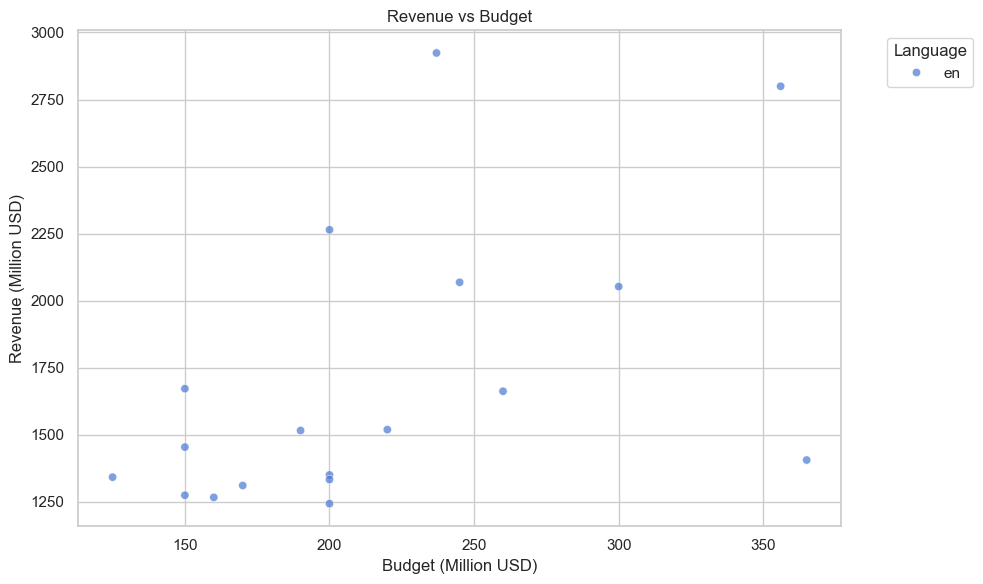

In [ ]:
#revenue vs budget
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget_musd', y='revenue_musd', hue='original_language', alpha=0.7)
plt.title('Revenue vs Budget')
plt.xlabel('Budget (Million USD)')
plt.ylabel('Revenue (Million USD)')
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Popularity vs Rating chart

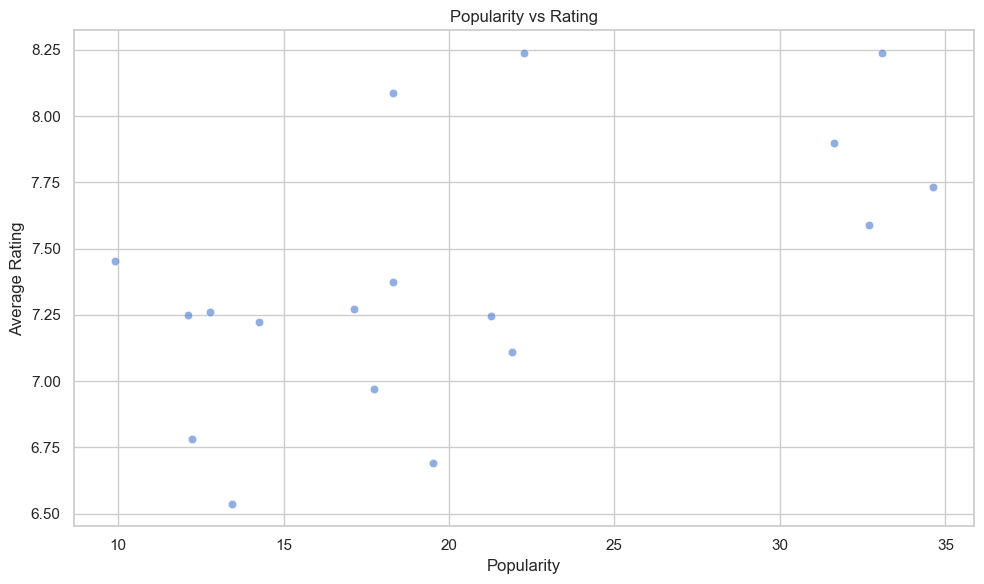

In [ ]:
def plot_popularity_vs_rating(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.6)
    plt.title('Popularity vs Rating')
    plt.xlabel('Popularity')
    plt.ylabel('Average Rating')
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

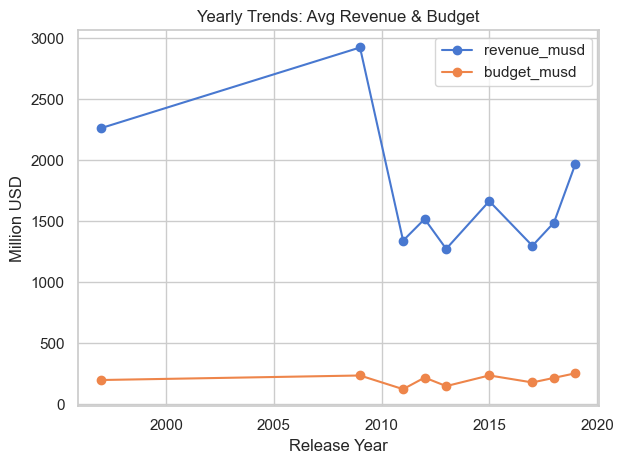

In [ ]:
def plot_yearly_revenue_budget(df):
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
    data = df.groupby('release_year')[['revenue_musd', 'budget_musd']].mean().dropna()
    data.plot(kind='line', marker='o', figsize=(12, 6))
    plt.title('Yearly Trends: Avg Revenue & Budget')
    plt.xlabel('Release Year')
    plt.ylabel('Million USD')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


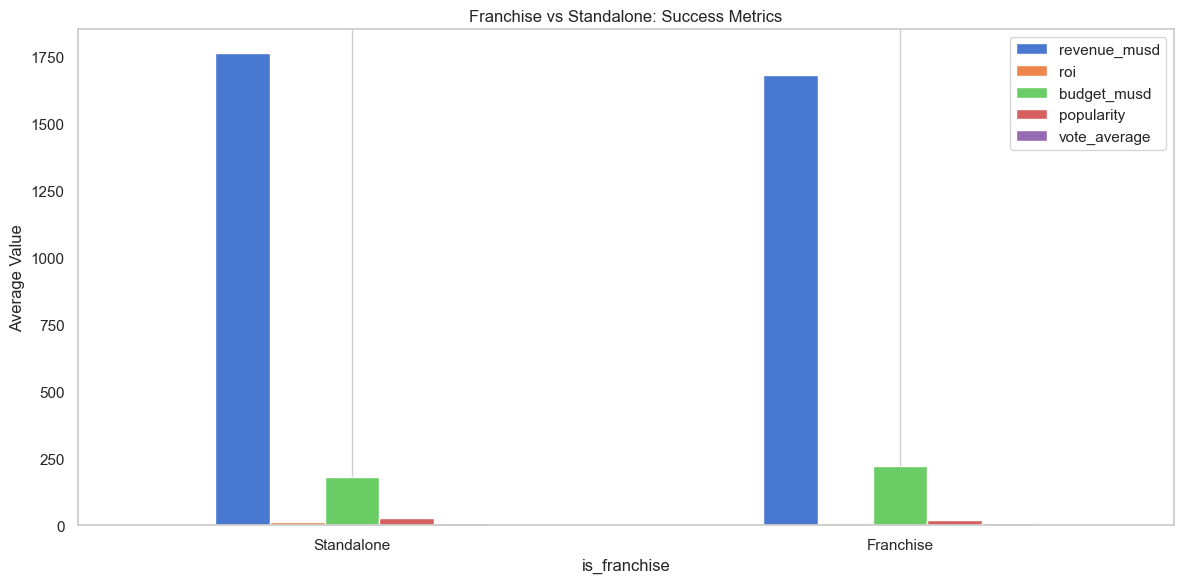

In [ ]:
# # Franchise vs. Standalone Success
# df['is_franchise'] = df['belongs_to_collection'].notna()

# comparison = df.groupby('is_franchise').agg({
#     'revenue_musd': 'mean',
#     'roi': 'median',
#     'budget_musd': 'mean',
#     'popularity': 'mean',
#     'vote_average': 'mean'
# }).rename(index={True: 'Franchise', False: 'Standalone'})

# comparison.plot(kind='bar', figsize=(12, 6))
# plt.title('Franchise vs Standalone: Success Metrics')
# plt.ylabel('Average Value')
# plt.xticks(rotation=0)
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()


import matplotlib.pyplot as plt

def plot_franchise_vs_standalone(df):
    """
    Compares success metrics between franchise and standalone movies.
    
    Parameters:
        df (pd.DataFrame): Movie DataFrame with columns:
                           'belongs_to_collection', 'revenue_musd', 'roi',
                           'budget_musd', 'popularity', 'vote_average'
    """
    df = df.copy()
    df['is_franchise'] = df['belongs_to_collection'].notna()

    comparison = df.groupby('is_franchise').agg({
        'revenue_musd': 'mean',
        'roi': 'median',
        'budget_musd': 'mean',
        'popularity': 'mean',
        'vote_average': 'mean'
    }).rename(index={True: 'Franchise', False: 'Standalone'})

    comparison.plot(kind='bar', figsize=(12, 6), colormap='Set2')
    plt.title('Franchise vs Standalone: Success Metrics')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


plot_franchise_vs_standalone(df)


In [79]:
df['genres']

0              Adventure|Science Fiction|Action
1      Action|Adventure|Fantasy|Science Fiction
2              Adventure|Action|Science Fiction
3              Adventure|Action|Science Fiction
4                                 Drama|Romance
5     Action|Adventure|Science Fiction|Thriller
6              Adventure|Drama|Family|Animation
7              Science Fiction|Action|Adventure
8                         Action|Thriller|Crime
9              Action|Adventure|Science Fiction
10             Action|Adventure|Science Fiction
11                            Fantasy|Adventure
12             Adventure|Action|Science Fiction
13    Family|Animation|Adventure|Comedy|Fantasy
14    Action|Adventure|Science Fiction|Thriller
15           Animation|Family|Adventure|Fantasy
16                       Family|Fantasy|Romance
17            Action|Adventure|Animation|Family
Name: genres, dtype: object

In [77]:
df.head()

,id,title,tagline,release_date,genres,belongs_to_collection,original_language,budget_musd,revenue_musd,production_companies,...,credits,cast,cast_size,director,crew_size,profit,roi,main_genre,release_year,is_franchise
0,299534,Avengers: Endgame,Avenge the fallen.,2019-04-24,Adventure|Science Fiction|Action,The Avengers Collection,en,356.0,2799.439100,Marvel Studios,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,105,Anthony Russo,593,2443.439100,7.863593,None,2019,True
1,19995,Avatar,Enter the world of Pandora.,2009-12-15,Action|Adventure|Fantasy|Science Fiction,Avatar Collection,en,237.0,2923.706026,Dune Entertainment|Lightstorm Entertainment|20...,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Sam Worthington|Zoe Saldaña|Sigourney Weaver|S...,65,James Cameron,986,2686.706026,12.336312,None,2009,True
2,140607,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,Adventure|Action|Science Fiction,Star Wars Collection,en,245.0,2068.223624,Lucasfilm Ltd.|Bad Robot,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,182,J.J. Abrams,257,1823.223624,8.441729,None,2015,True
3,299536,Avengers: Infinity War,Destiny arrives all the same.,2018-04-25,Adventure|Action|Science Fiction,The Avengers Collection,en,300.0,2052.415039,Marvel Studios,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Robert Downey Jr.|Chris Evans|Chris Hemsworth|...,69,Joe Russo,724,1752.415039,6.841383,None,2018,True
4,597,Titanic,Nothing on Earth could come between them.,1997-11-18,Drama|Romance,None,en,200.0,2264.162353,Paramount Pictures|20th Century Fox|Lightstorm...,...,"{'cast': [{'adult': False, 'gender': 2, 'id': ...",Leonardo DiCaprio|Kate Winslet|Billy Zane|Kath...,116,James Cameron,258,2064.162353,11.320812,None,1997,False


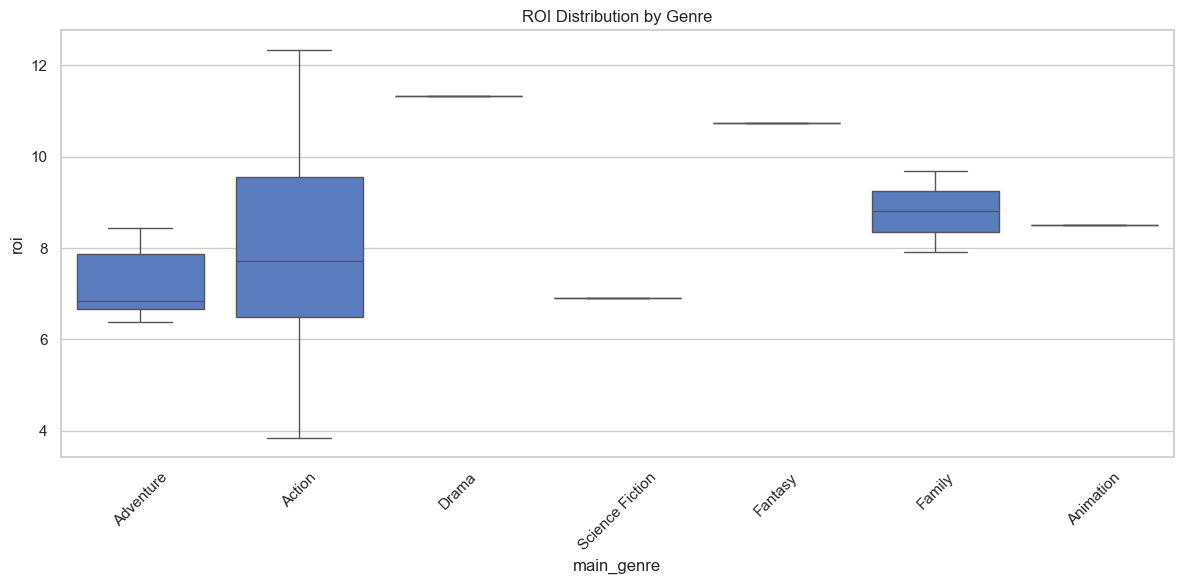

In [80]:


# 
df['roi'] = pd.to_numeric(df['roi'], errors='coerce')

# Step 2: Extract the main genre (first one before "|")
df['main_genre'] = df['genres'].apply(lambda x: x.split('|')[0] if isinstance(x, str) else None)

# Step 3: Drop missing values for clean plot
df_roi = df.dropna(subset=['roi', 'main_genre'])

# Step 4: Plot ROI distribution by main genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_roi, x='main_genre', y='roi')
plt.xticks(rotation=45)
plt.title('ROI Distribution by Genre')
plt.tight_layout()
plt.show()
